In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")

In [ ]:
train_df.head(2)

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup


In [ ]:
len(train_df.group_id.unique())

750

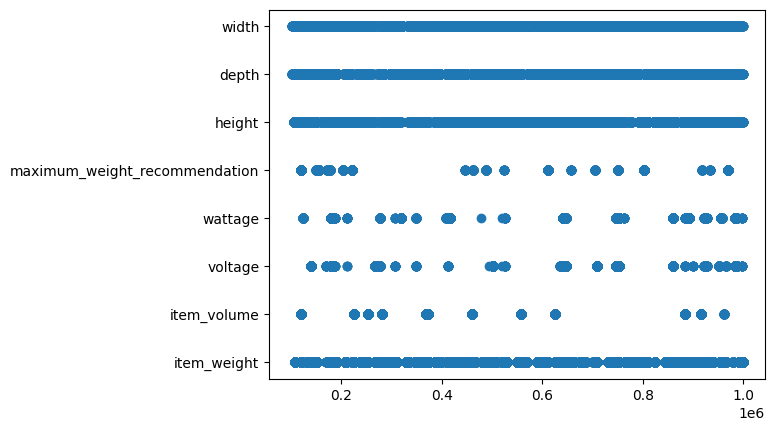

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_df.group_id, train_df.entity_name)

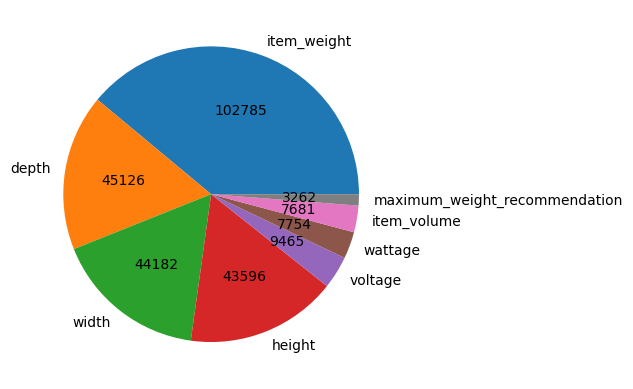

In [ ]:
x = train_df.entity_name.value_counts()

plt.pie(x, labels=x.index, autopct=lambda p: f'{int(p * sum(x) / 100)}')
plt.show()

In [ ]:
train_df_weight = train_df[train_df['entity_name'] == 'item_weight']

In [ ]:
train_df_weight["image_link"][0]

'https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg'

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image_url = "https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg"
def show_img(image_url):
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content))

  # Display the image
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

def ocr(image_url):
  results = reader.readtext(image_url)
  x = []
  for result in results:
      x.append(result[1])
      # text= result[1]
      # print(f"Detected text: '{text}'")
  return x

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
x = np.array(train_df_weight.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  if z == "1kilogram":
    print(c)
  units.append(z)
  c+=1
print(set(units))

25049
25634
47482
47484
47485
62233
{'inch', 'watt', 'ounce', '1kilogram', 'litre', 'quart', '2kilogram', 'pound', 'millilitre', 'nits', 'ton', 'cup', 'millimetre', 'kilogram', 'microgram', 'milligram', 'centimetre', 'gigabyte', 'candela', 'carat', 'gram'}


In [ ]:
train_df_weight['image_link'].iloc[25049]

'https://m.media-amazon.com/images/I/81CienQRpRL.jpg'

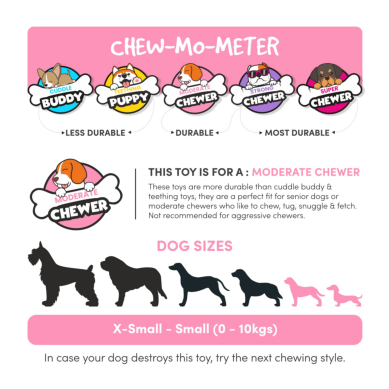

Progress: |██████████████████████████████████████████████████| 101.0% Complete

['chEw-Mo-METER',
 'LESS DURABLE',
 'DURABLE',
 'MOST DURABLE',
 'THIS TOY IS FORA : MODERATE CHEWER',
 'These toys are more durable than cuddle buddy &',
 'teething toys, they are a perfect fit for senior dogs or',
 'moderate chewers who like to chew; tug, snuggle & fetch:',
 'Not recommended for aggressive chewers.',
 'DOG SIZES',
 'X-Small',
 '5',
 'Small (0 - 1Okgs)',
 'In case your dog destroys this',
 'try the next chewing style:',
 'MUDERATE',
 'CUDDLE',
 'TEETHING',
 'STRONG',
 'SUPER',
 'CHEWER',
 'CHEWER',
 'CHEWER',
 'BUDDY',
 'PUpps',
 'MODERATE',
 'CHEWER',
 'toy,']

In [ ]:
show_img("https://m.media-amazon.com/images/I/81CienQRpRL.jpg")
ocr("https://m.media-amazon.com/images/I/81CienQRpRL.jpg")

In [ ]:
keywords = ["kg","g",""]
set(units)

{'1kilogram',
 '2kilogram',
 'candela',
 'carat',
 'centimetre',
 'cup',
 'gigabyte',
 'gram',
 'inch',
 'kilogram',
 'litre',
 'microgram',
 'milligram',
 'millilitre',
 'millimetre',
 'nits',
 'ounce',
 'pound',
 'quart',
 'ton',
 'watt'}

In [ ]:
train_df_voltage = train_df[train_df['entity_name'] == 'voltage']

In [ ]:
x = np.array(train_df_voltage.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  units.append(z)
  c+=1
print(set(units))

{'volt'}


In [ ]:
import re

for i in range(len(train_df_voltage[:10])):
    z = ocr(train_df_voltage["image_link"].iloc[i])
    print("\nFrom training data:")
    print(train_df_voltage["entity_value"].iloc[i])
    pattern = r'(\d+)\s*v(olt)?\b'
    for i in z:
      match = re.search(pattern, i, re.IGNORECASE)
      if match:
        # Print the number and the voltage unit
        print("Found:", match.group(1), match.group(2) or 'V')

Progress: |███████████████████████████████████████████████████| 103.1% Complete
From training data:
48.0 volt
Found: 48 V
Found: 48 V
Progress: |█████████████████████████████████████████████████████| 106.2% Complete
From training data:
36.0 volt
Found: 36 V
Progress: |██████████████████████████████████████████████████| 102.0% Complete
From training data:
[100.0, 240.0] volt
Found: 240 V
Progress: |██████████████████████████████████████████████████| 101.8% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.7% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.9% Complete
From training data:
12.0 volt
Progress: |████████████████████████████████████████████████████| 104.9% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.6% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 

In [ ]:
z = ocr(train_df_voltage["image_link"].iloc[3])
print("\nFrom training data:")
print(train_df_voltage["entity_value"].iloc[3])
pattern = r'(\d+)\s*v(olt)?\b'
for i in z:
  match = re.search(pattern, i, re.IGNORECASE)
  if match:
    print("Found:", match.group(1), match.group(2) or 'V')

Progress: |██████████████████████████████████████████████████| 101.8% Complete
From training data:
12.0 volt


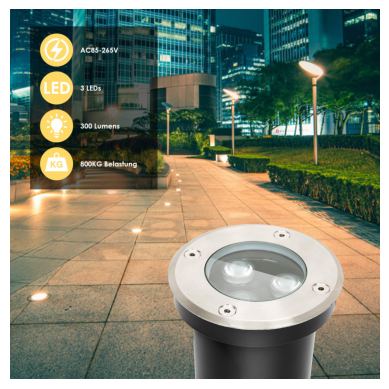

In [ ]:
show_img(train_df_voltage["image_link"].iloc[8])

In [ ]:
test_df = pd.read_csv("/content/test.csv")

In [ ]:
test_df

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth
...,...,...,...,...
131182,131283,https://m.media-amazon.com/images/I/A1rVsIzEtk...,721522,maximum_weight_recommendation
131183,131284,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,item_weight
131184,131285,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,maximum_weight_recommendation
131185,131286,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,item_weight


In [ ]:
import pandas as pd

predictions = []

pred_df = pd.DataFrame({
    'prediction': predictions
})

pred_df.index.name = 'index'

In [ ]:
volt_pred_df = test_df[test_df['entity_name']=="voltage"]

In [ ]:
volt_pred_df

,index,image_link,group_id,entity_name
19,19,https://m.media-amazon.com/images/I/218BCzgKxu...,348551,voltage
37,37,https://m.media-amazon.com/images/I/21cLufe8Y5...,648011,voltage
60,60,https://m.media-amazon.com/images/I/21tOerzlVM...,957050,voltage
65,65,https://m.media-amazon.com/images/I/21vv80MKQE...,709627,voltage
75,75,https://m.media-amazon.com/images/I/31+1xiVjZB...,997176,voltage
...,...,...,...,...
131087,131188,https://m.media-amazon.com/images/I/91vij4ee-G...,240413,voltage
131114,131215,https://m.media-amazon.com/images/I/91xOwqGhSV...,240413,voltage
131123,131224,https://m.media-amazon.com/images/I/91xm1-3iQs...,240413,voltage
131124,131225,https://m.media-amazon.com/images/I/91xp-halWC...,983323,voltage


In [ ]:
for i in volt_pred_df.index:
    z = ocr(volt_pred_df["image_link"].iloc[i])
    pattern = r'(\d+)\s*v(olt)?\b'
    for j in z:
      match = re.search(pattern, j, re.IGNORECASE)
      if match:
        print("\nFound:", match.group(1), match.group(2) or 'V')
        pred_df.loc[i] = match.group(1) + " volt"

Progress: |██████████████████████████████████████████████████████████████████| 133.7% Complete
Found: 220 V
Progress: |██████████████████████████████████████████████████████| 109.9% Complete
Found: 230 V
Progress: |█████████████████████████████████████████████████████████| 115.6% Complete
Found: 12 V
Progress: |███████████████████████████████████████████████████████████████| 126.6% Complete
Found: 5 V
Progress: |██████████████████████████████████████████████████████████| 117.1% Complete
Found: 110 V
Progress: |███████████████████████████████████████████████████| 102.4% Complete
Found: 220 V
Progress: |█████████████████████████████████████████████████████████████████| 130.5% Complete
Found: 240 V
Progress: |███████████████████████████████████████████████████| 102.7% Complete
Found: 120 olt
Progress: |████████████████████████████████████████████████████████| 113.5% Complete
Found: 220 V
Progress: |██████████████████████████████████████████████████| 100.4% Complete
Found: 110 V

Found: 11

IndexError: single positional indexer is out-of-bounds

In [ ]:
pred_df

,prediction
index,
65,220 volt
323,230 volt
334,12 volt
384,5 volt
388,110 volt
...,...
5457,2 volt
5459,2 volt
5464,12 volt
